In [1]:
import sys
sys.path.append('..')
import os 
os.environ['CUDA_VISIBLE_DEVICES'] = '1'

In [2]:
import networks
import torch
import mmcv
from mmcv.runner import load_checkpoint
from PIL import Image
from transforms import eval_transform
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np

In [3]:
net = networks.resnet50(num_classes=200).cuda()
checkpoint = load_checkpoint(net, '../out/resnet50/latest.pth')
root = '/home/jie.wang/data/CUB_200_2011/images/'
net.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [25]:
def read_image(path):
    img = Image.open(path).convert('RGB')
    img = img.resize((448,448))
    print(path)
    plt.figure()
    plt.axis('off')
    plt.imshow(np.array(img))
    img = eval_transform(img)
    return img[None]

def draw_cam(input, output, net):
    x = net.features(input)
    weight = net.fc.weight
    cam = F.conv2d(x, weight.reshape(weight.size(0), weight.size(1), 1, 1))
    cam = cam.squeeze()[torch.argmax(output, dim=1)]
    cam = F.interpolate(cam.unsqueeze(0), size=(448,448), mode='bilinear', align_corners=True)
    cam = cam.squeeze().detach().cpu().numpy()
    return cam

In [33]:
import glob
imagelist = sorted(glob.glob(root+'*/*.jpg'))

/home/jie.wang/data/CUB_200_2011/images/005.Crested_Auklet/Crested_Auklet_0011_794927.jpg
tensor(4, device='cuda:0')


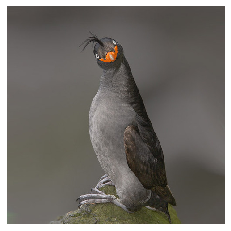

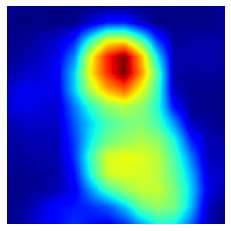

In [30]:
input = read_image(root+'005.Crested_Auklet/Crested_Auklet_0011_794927.jpg')
input = input.cuda()
output = net(input)
print(torch.argmax(output))
cam = draw_cam(input, output, net)
plt.figure()
plt.axis('off')
plt.imshow(cam, cmap='jet')

/home/jie.wang/data/CUB_200_2011/images/019.Gray_Catbird/Gray_Catbird_0007_20186.jpg
tensor(18, device='cuda:0')


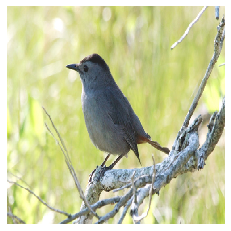

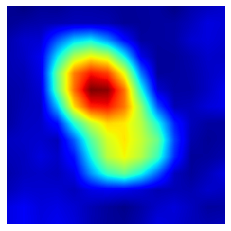

In [38]:
input = read_image(imagelist[1000])
input = input.cuda()
output = net(input)
print(torch.argmax(output))
cam = draw_cam(input, output, net)
plt.figure()
plt.axis('off')
plt.imshow(cam, cmap='jet')

In [35]:
for i, path in enumerate(imagelist):
    if 'Red_Cockaded_Woodpecker_0035_182435.jpg' in path:
        print(i)
        break

11161


In [35]:
conv = nn.Conv2d(10,20,1)

In [74]:
x = net.features(input)
conv.weight.data.shape
cam = F.conv2d(x, weight.reshape(weight.size(0), weight.size(1), 1, 1))
cam = cam.squeeze()[torch.argmax(output, dim=1)]
cam = F.interpolate(cam.unsqueeze(0), size=(448,448), mode='bilinear', align_corners=True)
cam = cam.squeeze().detach().cpu().numpy()

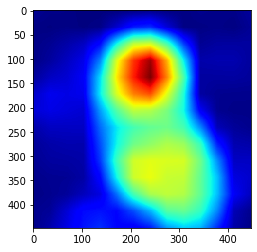

In [75]:
plt.imshow(cam, cmap='jet')

In [64]:
cam.shape

torch.Size([1, 14, 14])

In [55]:
!pip install matplotlib

Looking in indexes: https://mirrors.aliyun.com/pypi/simple/
    100% |████████████████████████████████| 13.1MB 7.6MB/s ta 0:00:011
    100% |████████████████████████████████| 92kB 339kB/s ta 0:00:011
    100% |████████████████████████████████| 71kB 4.6MB/s ta 0:00:011
